# Problem Statement

Our client a prominent mall has collected a dataset from its customers. The owner wants to create clusters / small teams where customers belong based on their annual income and spending score. He wants to target the right audience with the right ad. Our task here is to perform pattern recognition and create the clusters where customers belong.

From our dataset:
1. We wont need the Customer ID for the model
2. We will only utilize Income and Spending Score

## Dependencies & Data

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [14]:
df = pd.read_csv("Mall_Customers.csv")

In [15]:
X = df.iloc[:, [3,4]].values
# We get the all rows from the 3rd and 4rth column

## Elbow Method - Optimal Number Of Clusters
The WCSS list will be populated with the number of clusters. Kmean.inertia measures how well the clusters fit the data. It is the sum of quared distances between each data point. 

C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

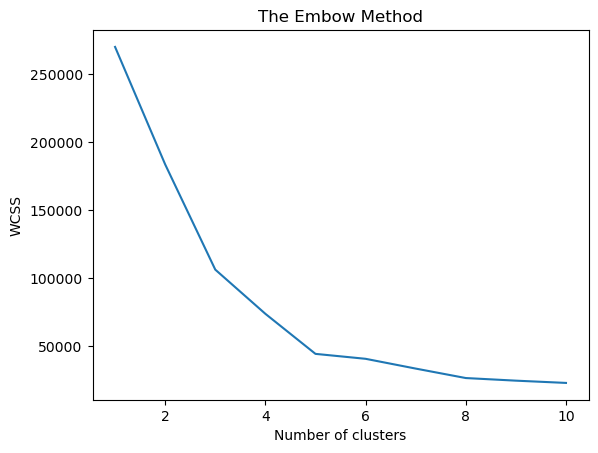

In [17]:
WCSS = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42 )
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1,11), WCSS)
plt.title("The Embow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

#### As it is shown the optimal number of cluster is 5

## Model Training & Making Predictions

In [20]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=42 )
y_kmeans = kmeans.fit_predict(X)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# Visualizing Clusters
Create a scatter for all the customers who belong to cluster 0 also we want all the rows that belong to the customer. Column 0 us the annual score and Column 1 is the spending score


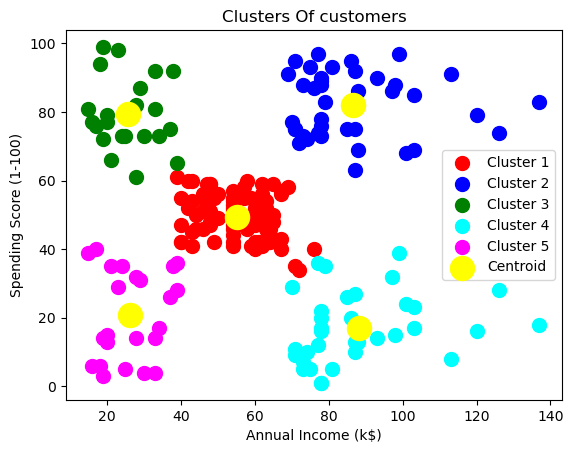

In [23]:

plt.scatter(X[y_kmeans == 0 ,0], X[y_kmeans == 0 ,1], s=100, color ='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1 ,0], X[y_kmeans == 1 ,1], s=100, color ='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2 ,0], X[y_kmeans == 2 ,1], s=100, color ='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3 ,0], X[y_kmeans == 3 ,1], s=100, color ='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4 ,0], X[y_kmeans == 4 ,1], s=100, color ='magenta', label='Cluster 5')

# plot the centroids for each cluster
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s = 300, color ='yellow', label ='Centroid')

plt.title("Clusters Of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()